In [131]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/inside-teen-minds-global-mental-health-and-habits/modern_teen_mental_health_main.csv
/kaggle/input/inside-teen-minds-global-mental-health-and-habits/wellness_habits_distribution.csv
/kaggle/input/inside-teen-minds-global-mental-health-and-habits/ai_tool_popularity.csv
/kaggle/input/inside-teen-minds-global-mental-health-and-habits/ai_usage_by_country.csv
/kaggle/input/inside-teen-minds-global-mental-health-and-habits/average_support_feeling_by_country.csv
/kaggle/input/inside-teen-minds-global-mental-health-and-habits/average_mood_stress_by_gender.csv
/kaggle/input/inside-teen-minds-global-mental-health-and-habits/daily_mood_stress_trends.csv
/kaggle/input/inside-teen-minds-global-mental-health-and-habits/screen_vs_sleep_by_age.csv


# Project:
## Health And Well Being EDA Analysis 

### Importing Libraries

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [133]:
mood_stress=pd.read_csv(r"/kaggle/input/inside-teen-minds-global-mental-health-and-habits/average_mood_stress_by_gender.csv")
support_feeling=pd.read_csv(r"/kaggle/input/inside-teen-minds-global-mental-health-and-habits/average_support_feeling_by_country.csv")
daily_mood_stress=pd.read_csv(r"/kaggle/input/inside-teen-minds-global-mental-health-and-habits/daily_mood_stress_trends.csv")
sleep=pd.read_csv(r"/kaggle/input/inside-teen-minds-global-mental-health-and-habits/screen_vs_sleep_by_age.csv")
habits=pd.read_csv(r"/kaggle/input/inside-teen-minds-global-mental-health-and-habits/wellness_habits_distribution.csv")

## Data Info

In [134]:
mood_stress

,gender,mood,stress_level
0,Female,6.01,4.04
1,Male,6.00,4.04
2,Other,5.99,4.05


In [135]:
support_feeling

,country,support_feeling
0,Australia,6.53
1,Brazil,6.52
2,Canada,6.47
3,Germany,6.52
4,India,6.46
5,Japan,6.51
6,UK,6.52
7,USA,6.49


In [136]:
daily_mood_stress

,date,mood,stress_level
0,2025-01-01,5.94,4.12
1,2025-01-02,6.01,4.03
2,2025-01-03,5.98,4.07
3,2025-01-04,6.03,4.03
4,2025-01-05,6.02,4.02
5,2025-01-06,5.99,4.04
6,2025-01-07,6.00,4.04
7,2025-01-08,5.93,4.09
8,2025-01-09,5.98,4.07
9,2025-01-10,6.12,3.92


In [137]:
sleep

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,age_group,screen_time_hours,sleep_hours
0,13-14,7.01,6.49
1,15-16,6.97,6.49
2,17-18,6.97,6.49
3,19-20,NaN,NaN


In [138]:
habits

,Unnamed: 0,Did,Did Not Do
0,journaled_today,14972,15028
1,meditated_today,8904,21096
2,exercised_today,11996,18004


## Data Handling & Cleaning

In [139]:
sleep["screen_time_hours"]=sleep["screen_time_hours"].fillna(sleep["screen_time_hours"].median())
sleep["sleep_hours"]=sleep["sleep_hours"].fillna(sleep["sleep_hours"].median())

In [140]:
habits.columns

Index(['Unnamed: 0', 'Did', 'Did Not Do'], dtype='object')

In [141]:
habits.rename({"Unnamed: 0":"activity"},axis=1,inplace=True)

In [142]:
habits

,activity,Did,Did Not Do
0,journaled_today,14972,15028
1,meditated_today,8904,21096
2,exercised_today,11996,18004


# EDA & VISUALIZATION

## Mood & Stress Level by Gender Visualization

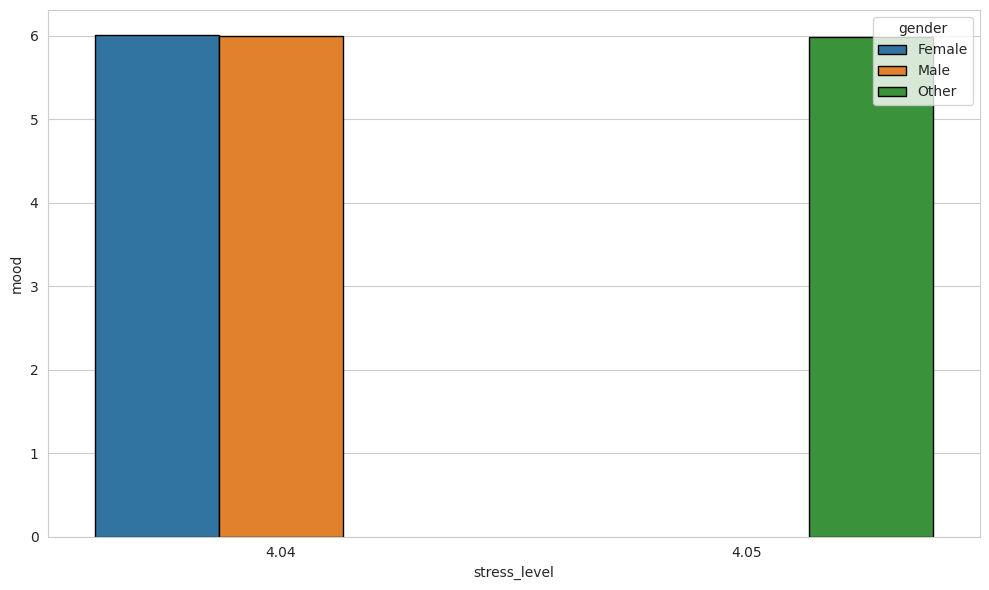

In [143]:
mood_stress
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.barplot(data=mood_stress,x="stress_level",y="mood",hue="gender",edgecolor="black")
plt.tight_layout()
plt.show()

## Support Feeling By Country

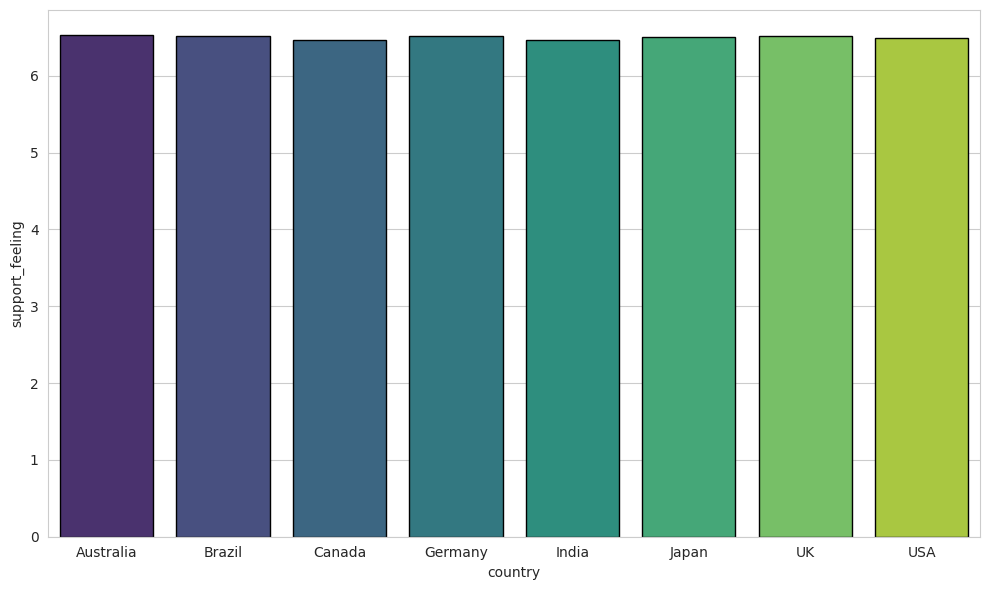

In [144]:
support_feeling
plt.figure(figsize=(10,6))
sns.barplot(data=support_feeling,x="country",y="support_feeling",edgecolor="black",palette='viridis')
plt.tight_layout()
plt.show()

## Mood & Stress Level Fluctuation By Date

<Axes: title={'center': 'Mood & Stress Level Fluctuation'}>

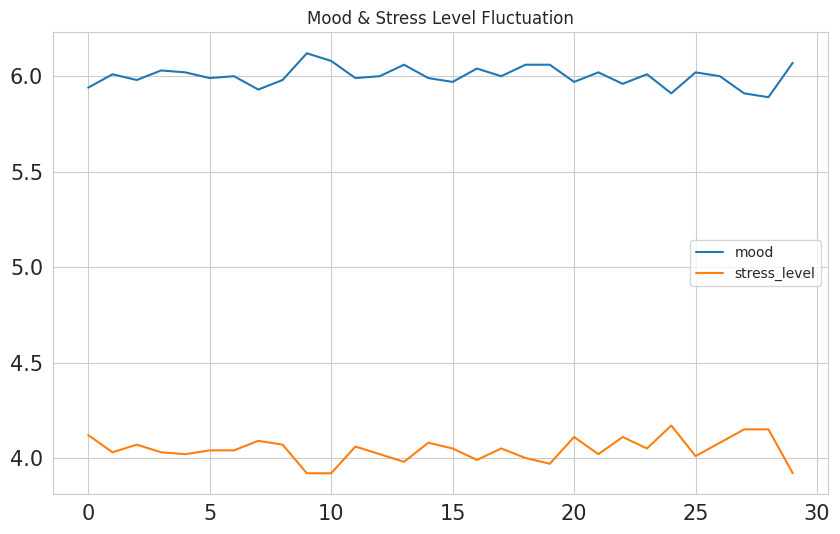

In [145]:
daily_mood_stress.plot(kind="line",figsize=(10,6),title="Mood & Stress Level Fluctuation",fontsize=15)


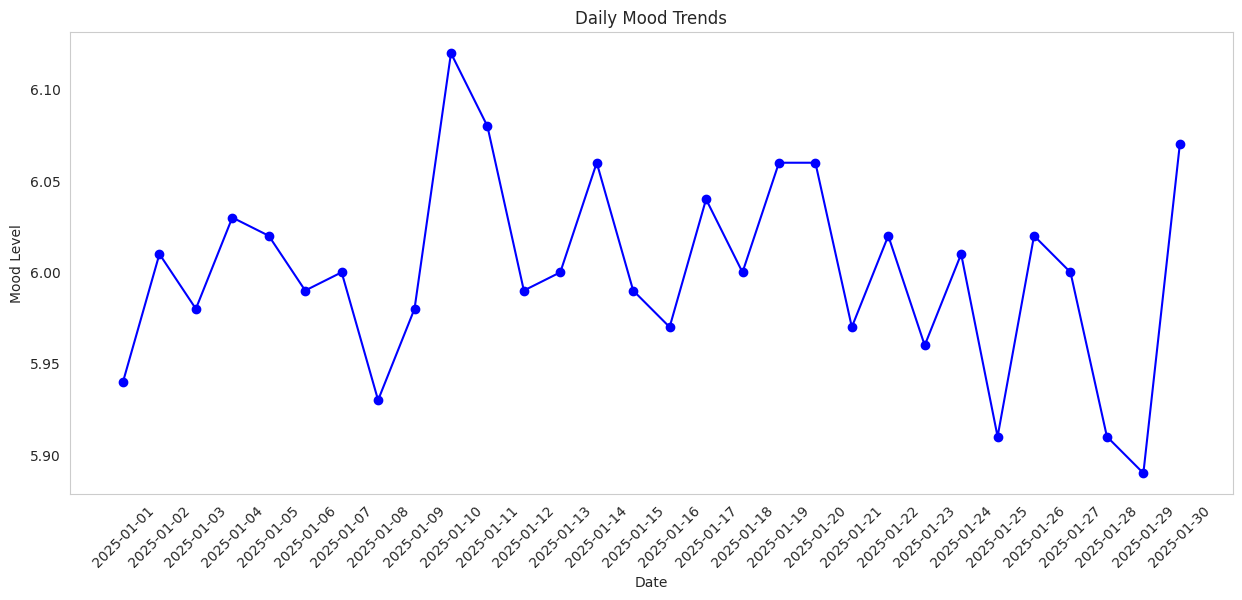

In [146]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))  # Adjust figure size for better readability
plt.plot(daily_mood_stress["date"], daily_mood_stress["mood"], marker="o", linestyle="-", color="blue")

plt.title("Daily Mood Trends")
plt.xlabel("Date")
plt.ylabel("Mood Level")
plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.grid()  # Add a grid for clarity
plt.show()


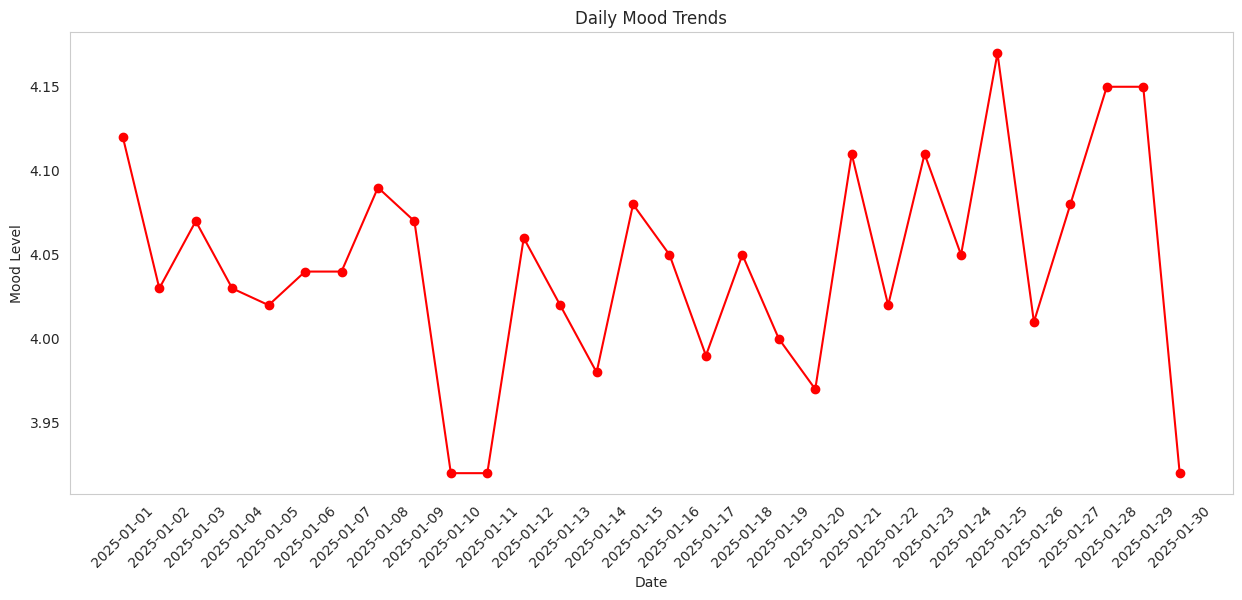

In [147]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))  # Adjust figure size for better readability
plt.plot(daily_mood_stress["date"], daily_mood_stress["stress_level"], marker="o", linestyle="-", color="red")

plt.title("Daily Mood Trends")
plt.xlabel("Date")
plt.ylabel("Mood Level")
plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.grid()  # Add a grid for clarity
plt.show()


## Screen Time & Sleep Hours

Text(0.5, 1.0, 'Sleep Hours Classification By Age Group')

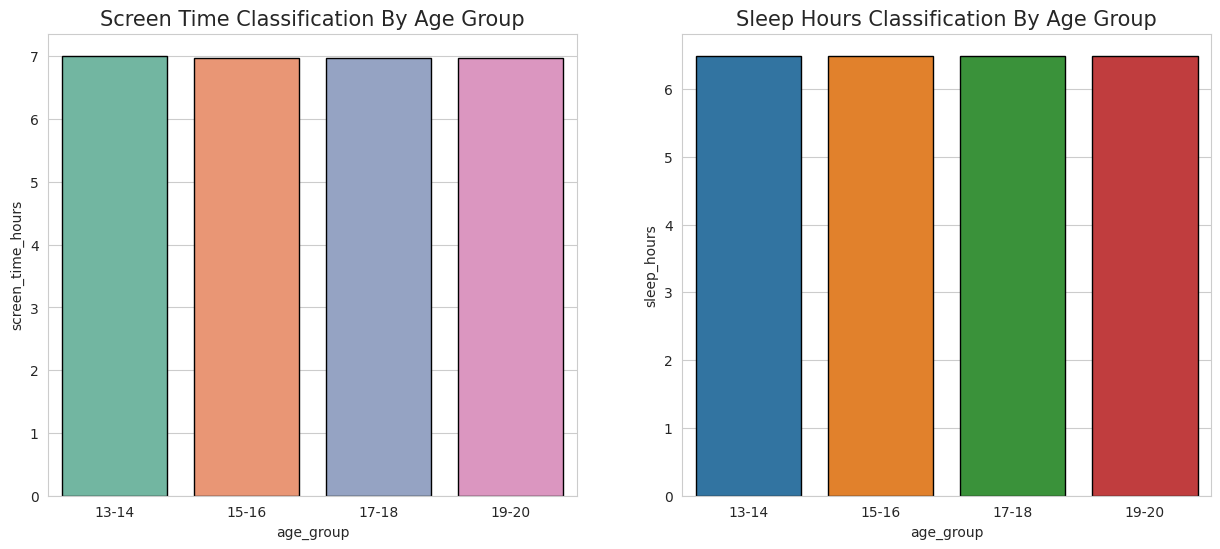

In [148]:
sleep
fig,axs=plt.subplots(1,2,figsize=(15,6))
sns.barplot(data=sleep,x="age_group",y="screen_time_hours",palette="Set2",edgecolor="black",ax=axs[0])
axs[0].set_title("Screen Time Classification By Age Group",fontsize=15)
sns.barplot(data=sleep,x="age_group",y="sleep_hours",edgecolor="black",ax=axs[1])
axs[1].set_title("Sleep Hours Classification By Age Group",fontsize=15)


## Daily Habits Visualization

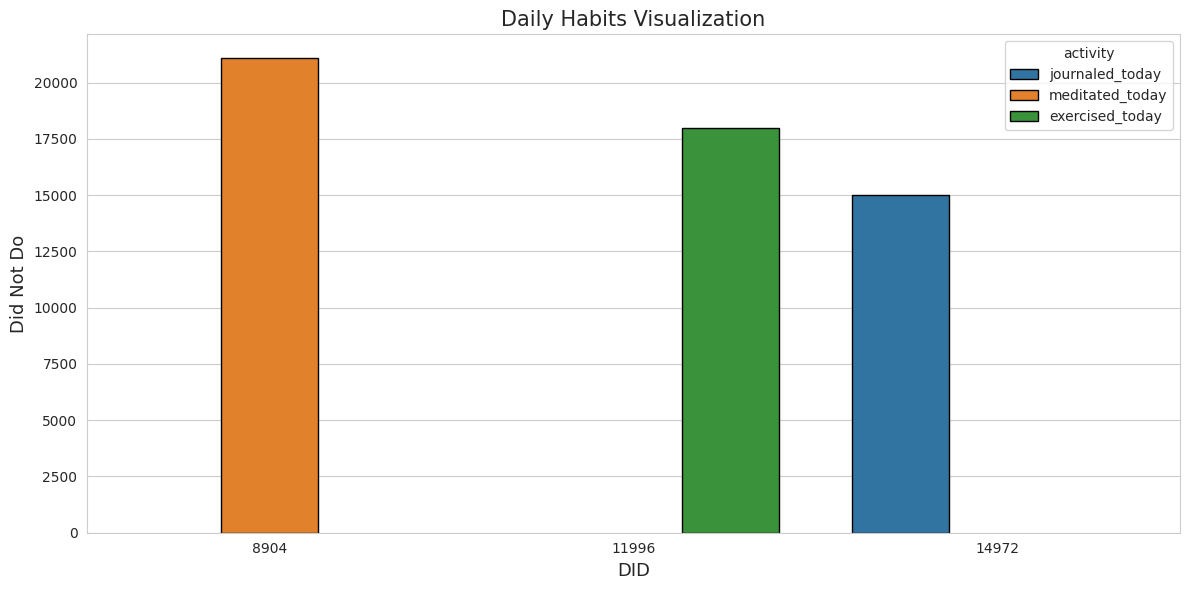

In [156]:
habits
plt.figure(figsize=(12,6))
sns.barplot(data=habits,x="Did",y="Did Not Do",hue="activity",edgecolor="black")
plt.title("Daily Habits Visualization",fontsize=15)
plt.xlabel("DID",fontsize=13)
plt.ylabel("Did Not Do",fontsize=13)
plt.tight_layout()
plt.show()